In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline


#pd.set_option('display.max_rows', 10)
#pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 10)

#plt.style.use('ggplot')

In [2]:
cd

/Users/kimberlygrauer


In [3]:
df = pd.read_csv(('Desktop/HVS_small.csv'))

In [90]:
list(df.columns.values)

['Borough',
 'wages',
 'exemption',
 'sex',
 'age',
 'hispanic',
 'POB',
 'race',
 'NCSR',
 'exemption_detail',
 'Place of birth-householder',
 'Units_No',
 'toilet_breakdown']

In [89]:
df.count() # there are no missing observations.

Borough                       15342
wages                         15342
exemption                     15342
sex                           15342
age                           15342
hispanic                      15342
POB                           15342
race                          15342
NCSR                          15342
exemption_detail              15342
Place of birth-householder    15342
Units_No                      15342
toilet_breakdown              15342
dtype: int64

In [ ]:
# The next part of cleaning the data up is to get dummies for the categorical variables.

In [94]:
dummy_ranks_sex = pd.get_dummies(df['sex'], prefix='sex')
print dummy_ranks_sex.head()


   sex_1  sex_2
0    0.0    1.0
1    1.0    0.0
2    0.0    1.0
3    0.0    1.0
4    1.0    0.0


In [95]:
cols_to_keep = ['age', 'wages', 'exemption_detail','hispanic']
data = df[cols_to_keep].join(dummy_ranks_sex.ix[:, 'sex_2'])
data.head()

,age,wages,exemption_detail,hispanic,sex_2
0,61,35000,12,4,1.0
1,28,165000,12,3,0.0
2,65,167000,12,1,1.0
3,29,15000,80,2,1.0
4,74,0,1,2,0.0


In [96]:
dummy_ranks_race = pd.get_dummies(df['race'], prefix='race')
print dummy_ranks_race.head()

   race_1  race_2  race_3  race_4  race_5  race_6
0     0.0     1.0     0.0     0.0     0.0     0.0
1     0.0     1.0     0.0     0.0     0.0     0.0
2     0.0     1.0     0.0     0.0     0.0     0.0
3     1.0     0.0     0.0     0.0     0.0     0.0
4     1.0     0.0     0.0     0.0     0.0     0.0


In [97]:
data1 = data.join([dummy_ranks_race])
data1.head()

,age,wages,exemption_detail,hispanic,sex_2,race_1,race_2,race_3,race_4,race_5,race_6
0,61,35000,12,4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,165000,12,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,65,167000,12,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,29,15000,80,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,74,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
dummy_ranks_pob = pd.get_dummies(df['POB'], prefix='pob')
print dummy_ranks_pob.head()

   pob_7  pob_9  pob_10  pob_11  pob_12  pob_13  pob_14  pob_15  pob_16  \
0    1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    0.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    0.0    0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pob_17  pob_18  pob_19  pob_20  pob_21  pob_22  pob_23  pob_24  pob_25  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pob_26  pob_98  
0     0.0     0.0  
1     0.0     0.0  
2     0.0     0.0  
3     

In [100]:
data_full = data.join([dummy_ranks_pob])
data_full.head()

,age,wages,exemption_detail,hispanic,sex_2,pob_7,pob_9,pob_10,pob_11,pob_12,...,pob_18,pob_19,pob_20,pob_21,pob_22,pob_23,pob_24,pob_25,pob_26,pob_98
0,61,35000,12,4,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28,165000,12,3,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,65,167000,12,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29,15000,80,2,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74,0,1,2,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


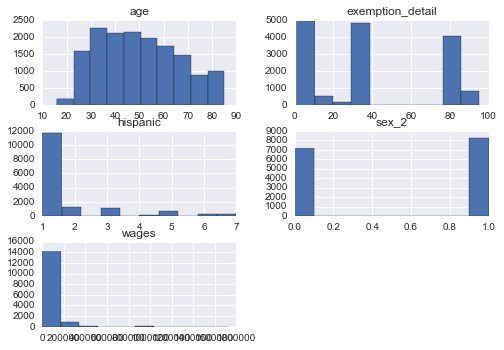

In [102]:
import pylab as pl
data.hist()
pl.show()

In [105]:
data_full.head(1)

,age,wages,exemption_detail,hispanic,sex_2,pob_7,pob_9,pob_10,pob_11,pob_12,...,pob_18,pob_19,pob_20,pob_21,pob_22,pob_23,pob_24,pob_25,pob_26,pob_98
0,61,35000,12,4,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
"""
I decided to keep all of the dummy variables, and not exclude those who "failed to report
because I thought that this might be useful information for analysis. 

"""

In [ ]:
"""
I have designated several databases here now for analysis that I will review:

data = has exemption, age, wages, hispanic and dummy 
df = has all the original variables with no dummy's broken out
data_full = has all the variables of interest with dummies broken out and one of the dummies dropped to 
avoid the dummy variable trap.

For analysis I wll restrict myself to one of these three data sets, depending on what I am looking
to investigate.

"""

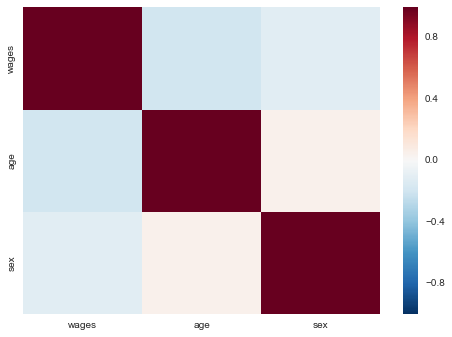

In [106]:
sns.heatmap(df[['wages', 'age', 'sex']].corr())

In [7]:
df.head(2)

,Borough,wages,exemption,sex,age,hispanic,POB,race,NCSR,exemption_detail,Place of birth-householder,Units_No,toilet_breakdown
0,Bronx,35000,0,2,61,4,7,2,Owner occupied condo,12,7,6,2
1,Bronx,165000,0,1,28,3,7,2,Owner occupied condo,12,7,6,2


Skipping line 13: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 2
Skipping line 16: expected 1 fields, saw 4
Skipping line 29: expected 1 fields, saw 2
Skipping line 42: expected 1 fields, saw 4
Skipping line 61: expected 1 fields, saw 2
Skipping line 62: expected 1 fields, saw 2
Skipping line 70: expected 1 fields, saw 2
Skipping line 71: expected 1 fields, saw 2
Skipping line 76: expected 1 fields, saw 4
Skipping line 79: expected 1 fields, saw 2
Skipping line 83: expected 1 fields, saw 2
Skipping line 84: expected 1 fields, saw 2
Skipping line 93: expected 1 fields, saw 4
Skipping line 102: expected 1 fields, saw 4
Skipping line 106: expected 1 fields, saw 4
Skipping line 109: expected 1 fields, saw 3
Skipping line 115: expected 1 fields, saw 2
Skipping line 123: expected 1 fields, saw 2
Skipping line 126: expected 1 fields, saw 4
Skipping line 132: expected 1 fields, saw 4
Skipping line 153: expected 1 fields, saw 2
Skipping line 154: expected 1 fields, saw 2
Sk

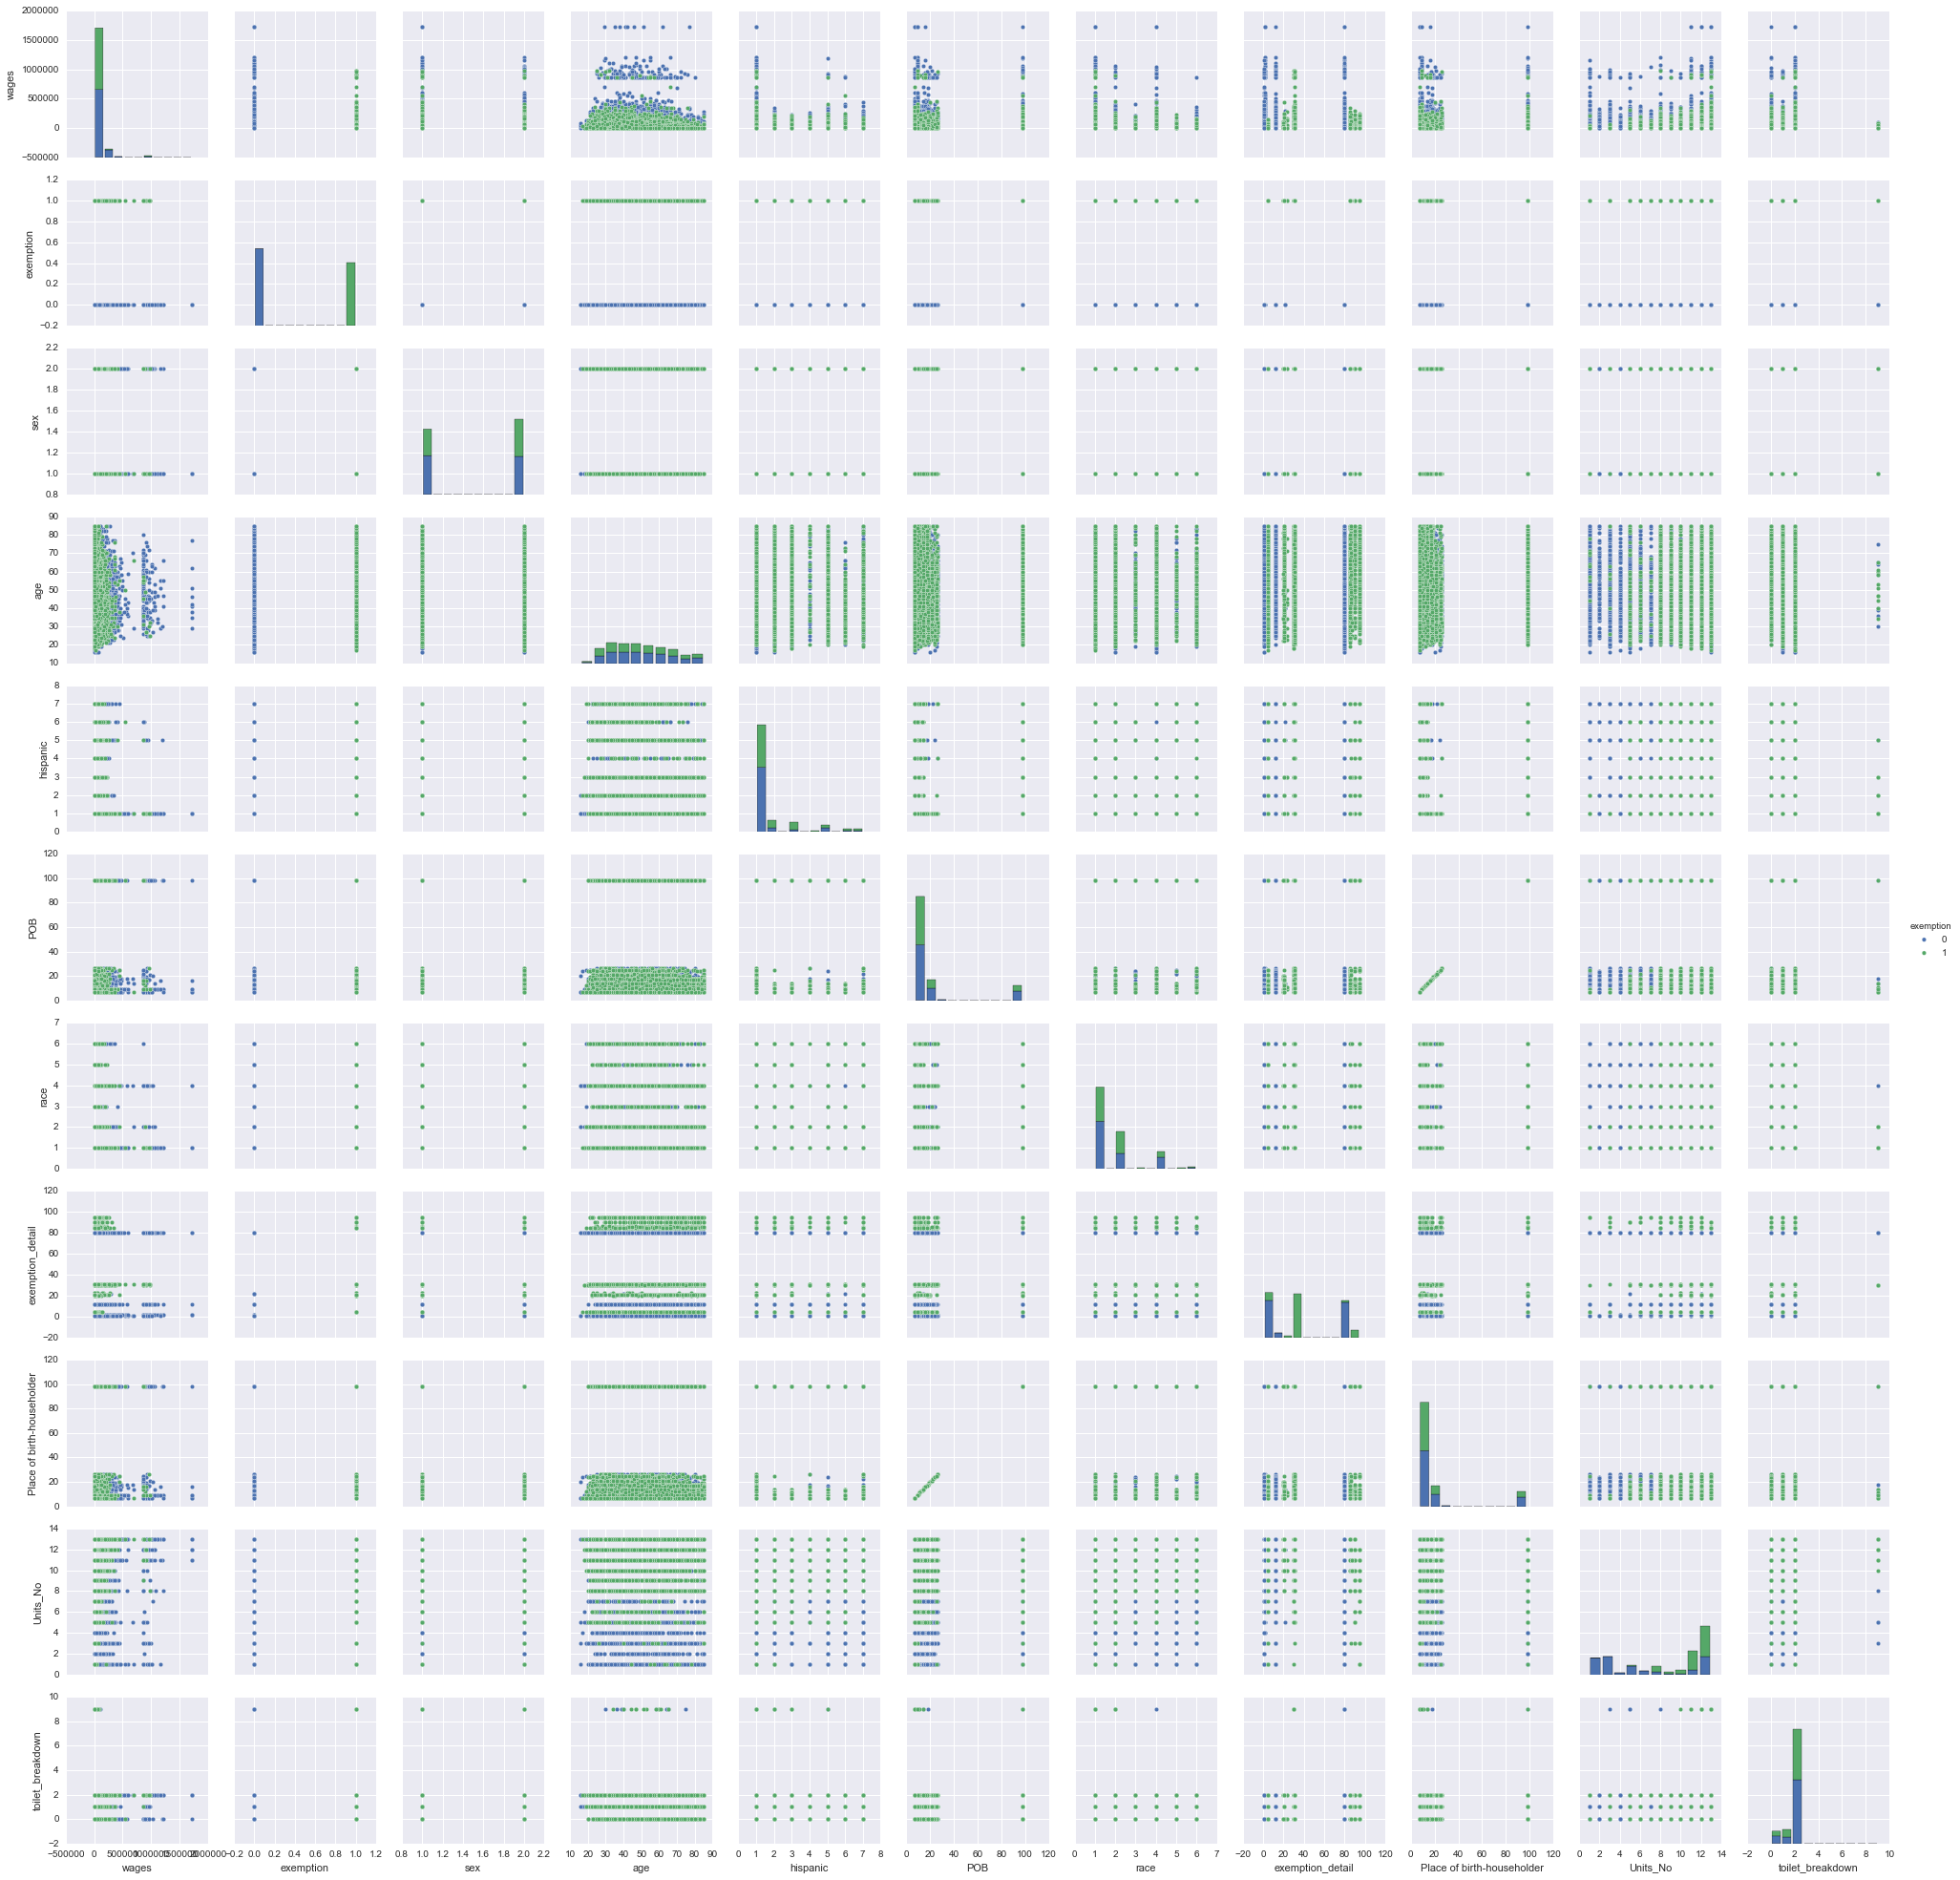

In [8]:
import seaborn as sns
sns.set()

df_new = sns.load_dataset("Desktop/HVS_small.csv", error_bad_lines=False)
sns.pairplot(df, hue='exemption')

In [11]:
df.columns.value_counts()

Place of birth-householder    1
Borough                       1
wages                         1
age                           1
exemption_detail              1
toilet_breakdown              1
hispanic                      1
sex                           1
NCSR                          1
race                          1
Units_No                      1
exemption                     1
POB                           1
dtype: int64

In [12]:
df_new = df[df['exemption'] == 0]

In [14]:
df_new.head()

,Borough,wages,exemption,sex,age,hispanic,POB,race,NCSR,exemption_detail,Place of birth-householder,Units_No,toilet_breakdown
0,Bronx,35000,0,2,61,4,7,2,Owner occupied condo,12,7,6,2
1,Bronx,165000,0,1,28,3,7,2,Owner occupied condo,12,7,6,2
2,Bronx,167000,0,2,65,1,9,2,Owner occupied condo,12,9,6,2
3,Bronx,15000,0,2,29,2,7,1,Other rental,80,7,3,2
4,Bronx,0,0,1,74,2,10,1,Owner occupied conventional,1,10,4,1


In [15]:
df_publichousing = df[df['exemption_detail'] == 5]
df_post1947 = df[df['exemption_detail'] == 31]
df_pre1947 = df[df['exemption_detail'] == 30]
df_mitchell_lama = df[df['exemption_detail'] == 85]
df_hud = df[df['exemption_detail'] == 21]

In [17]:
df_clear = df[df['wages'] < 100000]

In [18]:
df_toilet = df[df['toilet_breakdown'] > 0]

In [19]:
def reject_outliers(df):
    m = 2
    u = np.mean(df)
    s = np.std(df)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

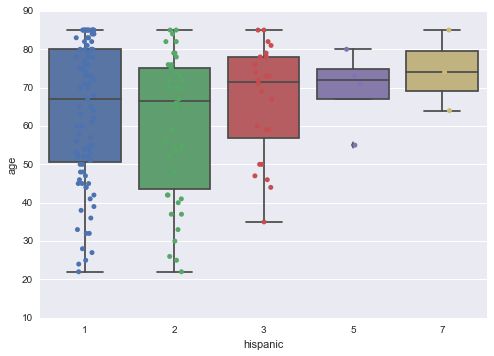

In [119]:
ax = sns.boxplot(x="hispanic", y="age", data=df_hud)
ax = sns.stripplot(x="hispanic", y="age", data=df_hud, jitter=True, edgecolor="gray")

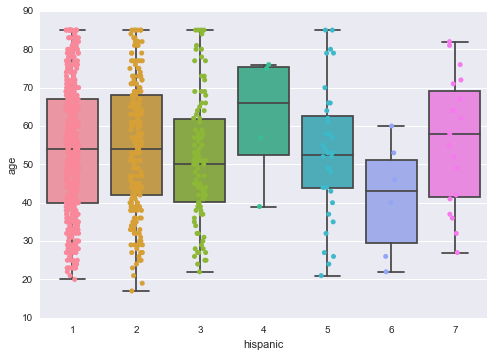

In [118]:
ax = sns.boxplot(x="hispanic", y="age", data=df_publichousing)
ax = sns.stripplot(x="hispanic", y="age", data=df_publichousing, jitter=True, edgecolor="gray")

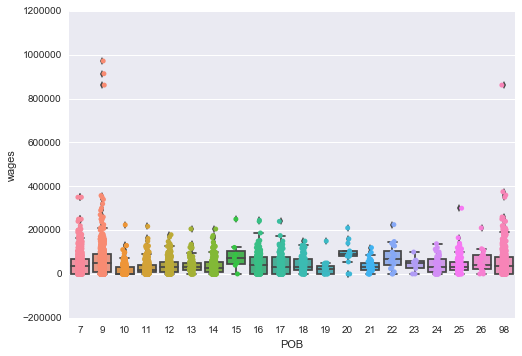

In [120]:
ax = sns.boxplot(x="POB", y="wages", data=df_pre1947)
ax = sns.stripplot(x="POB", y="wages", data=df_pre1947, jitter=True, edgecolor="gray")

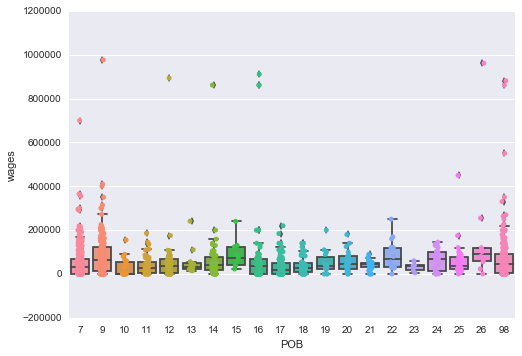

In [121]:
ax = sns.boxplot(x="POB", y="wages", data=df_post1947)
ax = sns.stripplot(x="POB", y="wages", data=df_post1947, jitter=True, edgecolor="gray")

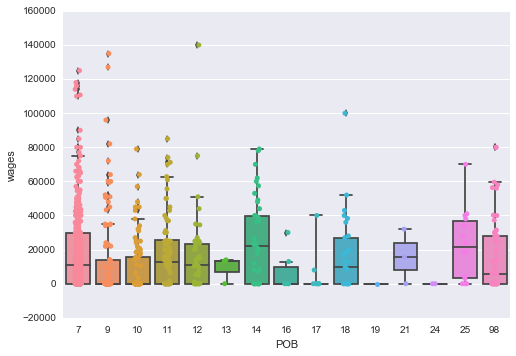

In [122]:
ax = sns.boxplot(x="POB", y="wages", data=df_publichousing)
ax = sns.stripplot(x="POB", y="wages", data=df_publichousing, jitter=True, edgecolor="gray")

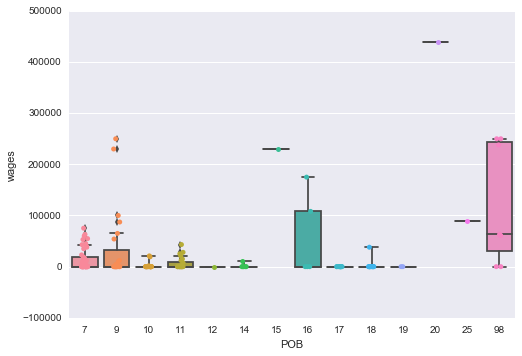

In [123]:
ax = sns.boxplot(x="POB", y="wages", data=df_hud)
ax = sns.stripplot(x="POB", y="wages", data=df_hud, jitter=True, edgecolor="gray")

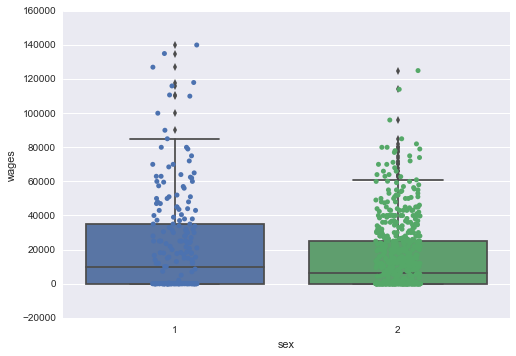

In [117]:
ax = sns.boxplot(x="sex", y="wages", data=df_publichousing)
ax = sns.stripplot(x="sex", y="wages", data=df_publichousing, jitter=True, edgecolor="gray")

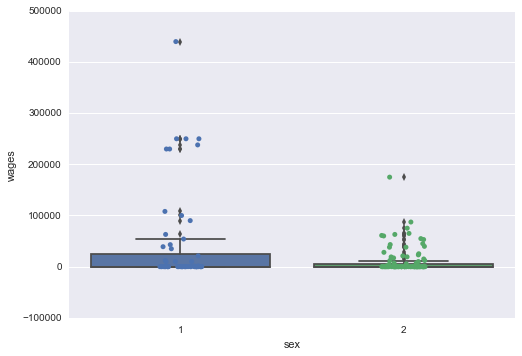

In [109]:
ax = sns.boxplot(x="sex", y="wages", data=df_hud)
ax = sns.stripplot(x="sex", y="wages", data=df_hud, jitter=True, edgecolor="gray")

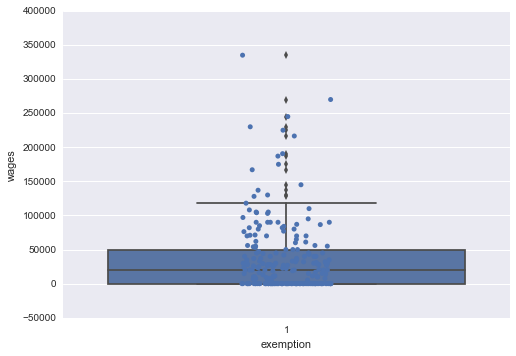

In [24]:
ax = sns.boxplot(x="exemption", y="wages", data=df_mitchell_lama)
ax = sns.stripplot(x="exemption", y="wages", data=df_mitchell_lama, jitter=True, edgecolor="gray")

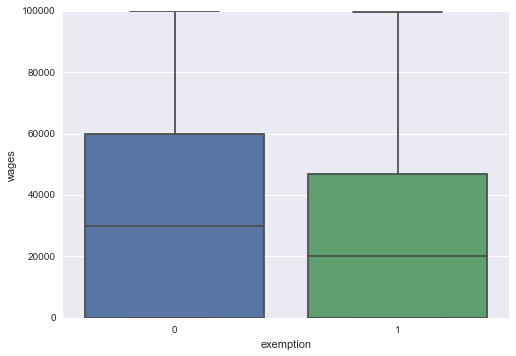

In [25]:
sns.boxplot(x="exemption", y="wages", data=df_clear)

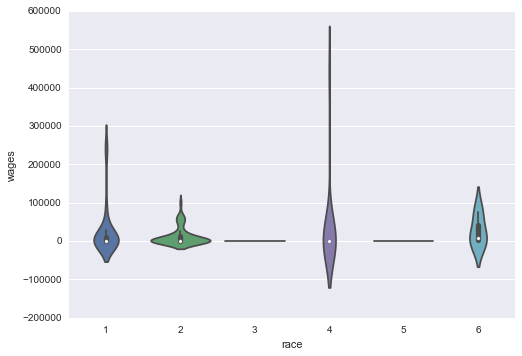

In [26]:
sns.violinplot(x="race", y="wages", data=df_hud, size=6)

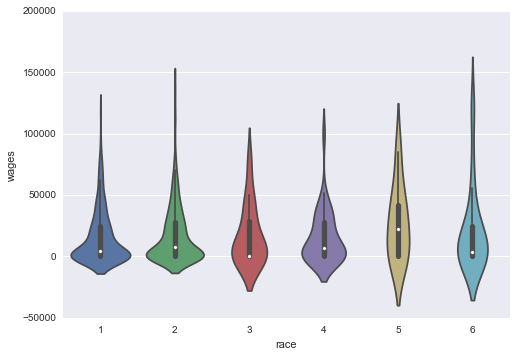

In [107]:
sns.violinplot(x="race", y="wages", data=df_publichousing, size=6)

In [28]:
#from pandas.tools.plotting import andrews_curves
#andrews_curves(df.drop("Borough", axis=1), "exemption")

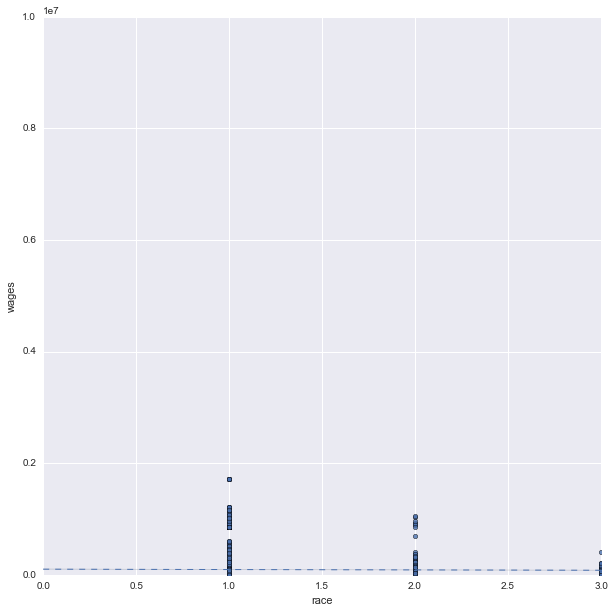

In [34]:
plt.figure(figsize=(10, 10))
axes = sns.regplot(data=df_new, # Dataframe to use (required)
            x='race',  # Dataframe column name for x-axis (required)
            y='wages', # Dataframe column name for y-axis (required)
            line_kws={'linestyle':'--', 'linewidth': 1},  # Additional plot arguments
            scatter_kws={'linewidth': 0.5, 'edgecolor': "black"})

axes.set_ylim(0, 1e7)
axes.set_xlim(0, 3);

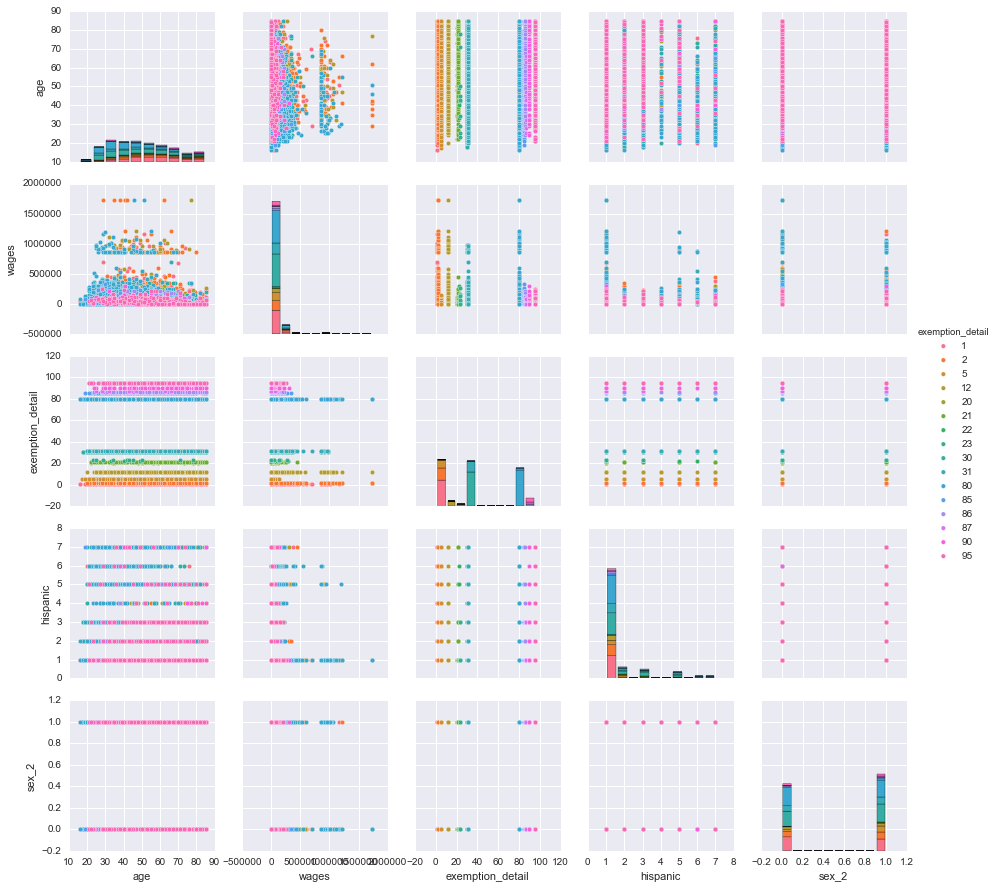

In [155]:
import seaborn as sns
sns.set()

#data_full = sns.load_dataset("Desktop/HVS_small.csv", error_bad_lines=False)
sns.pairplot(data, hue='exemption_detail')

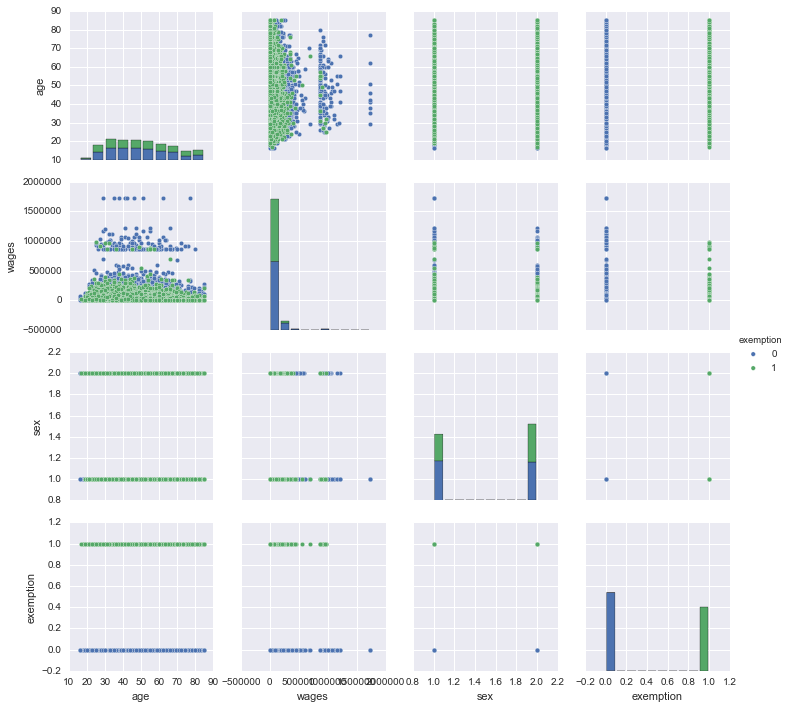

In [35]:
import seaborn as sns

pairs = df[['age', 'wages', 'sex', 'exemption']]

import matplotlib.pyplot as plt

sns.pairplot(pairs, hue='exemption')

In [ ]:
"""
There are a lot of interesting things you can see from the graphs above that I did not
get to go over in the presentation. For example, the violin plots show that public housing
has a lot more variation in wages than those in HUD. A conclusion you can draw, and supported
by news sources, is that once people receive public housing, they are not forced to leave as
their income goes up. Therefore often times you will see people with higher wages in public
housing. This is not the same for HUD vouchers.

There are also richer men than women in both types of housing, but not many conclusions can 
be drawn outright from this fact. It could be that there are more men in public and hud housing.

When we look at the place of birth graphs - for interpretation of axis see data dictionary - 
you can also see similar trends. Public housing has higher wage individuals, regardless of 
POB. 
"""

In [91]:
df.corr()

,wages,exemption,sex,age,hispanic,POB,race,exemption_detail,Place of birth-householder,Units_No,toilet_breakdown
wages,1.000000,-0.197424,-0.114203,-0.190122,-0.071687,0.032662,-0.043294,-0.032369,0.032662,0.005868,-0.007297
exemption,-0.197424,1.000000,0.087743,0.004699,0.105683,-0.029483,-0.008474,-0.028664,-0.029483,0.582164,0.001490
sex,-0.114203,0.087743,1.000000,0.049388,0.030512,-0.054545,-0.018039,-0.011364,-0.054545,0.071870,0.006386
age,-0.190122,0.004699,0.049388,1.000000,-0.080152,-0.017727,-0.072791,-0.209357,-0.017727,-0.035766,0.005518
hispanic,-0.071687,0.105683,0.030512,-0.080152,1.000000,-0.041442,-0.087096,0.064243,-0.041442,0.028936,0.017847
POB,0.032662,-0.029483,-0.054545,-0.017727,-0.041442,1.000000,0.013452,-0.002173,1.000000,0.017009,-0.556563
race,-0.043294,-0.008474,-0.018039,-0.072791,-0.087096,0.013452,1.000000,0.007047,0.013452,-0.038999,0.007734
exemption_detail,-0.032369,-0.028664,-0.011364,-0.209357,0.064243,-0.002173,0.007047,1.000000,-0.002173,0.070809,0.019167
Place of birth-householder,0.032662,-0.029483,-0.054545,-0.017727,-0.041442,1.000000,0.013452,-0.002173,1.000000,0.017009,-0.556563
Units_No,0.005868,0.582164,0.071870,-0.035766,0.028936,0.017009,-0.038999,0.070809,0.017009,1.000000,-0.015030


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split, cross_val_score, KFold

In [40]:
from sklearn import feature_selection, linear_model

# From last class...
def get_linear_model_metrics(X, y):
    # 1. Define and configure the model:
    model = linear_model.LinearRegression()
    f, pvals = feature_selection.f_regression(X, y)

    # 2. Fit the model
    model.fit(X, y)

    # 3. Evaluate & score the model
    residuals = (y - model.predict(X)).values

    print 'P values:', pvals
    print 'Coefficients:', model.coef_
    print 'y-intercept:', model.intercept_
    print 'R-Squared:', model.score(X,y)
    print
    
    return model

In [41]:
X = df[['age','wages']]
y = df['exemption']

get_linear_model_metrics(X, y);

P values: [  5.60547158e-001   1.21078722e-134]
Coefficients: [ -1.01076460e-03  -8.60730288e-07]
y-intercept: 0.560433068497
R-Squared: 0.0400950093778



In [ ]:
"""Linear model has a very low r-Squared."""

In [42]:
gender = pd.get_dummies(df_toilet.sex)
gender.columns = ['gender_' + str(i) for i in gender.columns]
df_model_1 = df_toilet.join(gender)

In [43]:
race1 = pd.get_dummies(df_toilet.race)
race1.columns = ['race1_' + str(i) for i in race1.columns]
df_model_1 = df_model_1.join(race1)

In [44]:
toilet = pd.get_dummies(df_toilet.toilet_breakdown)
toilet.columns = ['toilet_' + str(i) for i in toilet.columns]
df_model_1 = df_model_1.join(toilet)

In [317]:
list(df_model_1.columns.values)

['Borough',
 'wages',
 'exemption',
 'sex',
 'age',
 'hispanic',
 'POB',
 'race',
 'NCSR',
 'exemption_detail',
 'Place of birth-householder',
 'Units_No',
 'toilet_breakdown',
 'gender_1',
 'gender_2',
 'race1_1',
 'race1_2',
 'race1_3',
 'race1_4',
 'race1_5',
 'race1_6',
 'POB1_7',
 'POB1_9',
 'POB1_10',
 'POB1_11',
 'POB1_12',
 'POB1_13',
 'POB1_14',
 'POB1_15',
 'POB1_16',
 'POB1_17',
 'POB1_18',
 'POB1_19',
 'POB1_20',
 'POB1_21',
 'POB1_22',
 'POB1_23',
 'POB1_24',
 'POB1_25',
 'POB1_26',
 'POB1_98',
 'toilet_1',
 'toilet_2',
 'toilet_9']

In [45]:
gender = pd.get_dummies(df.sex)
gender.columns = ['gender_' + str(i) for i in gender.columns]
df_model = df.join(gender)

In [46]:
race1 = pd.get_dummies(df.race)
race1.columns = ['race1_' + str(i) for i in race1.columns]
df_model = df_model.join(race1)

In [47]:
POB1 = pd.get_dummies(df.POB)
POB1.columns = ['POB1_' + str(i) for i in POB1.columns]
df_model = df_model.join(POB1)

In [48]:
df_model.head(2)

,Borough,wages,exemption,sex,age,hispanic,POB,race,NCSR,exemption_detail,...,POB1_18,POB1_19,POB1_20,POB1_21,POB1_22,POB1_23,POB1_24,POB1_25,POB1_26,POB1_98
0,Bronx,35000,0,2,61,4,7,2,Owner occupied condo,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bronx,165000,0,1,28,3,7,2,Owner occupied condo,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
columns_to_keep_2 = ['wages', 'age', 'gender_2','Units_No']

In [133]:
columns_to_keep_3 = ['race', 'age', 'wages', 'gender_2', 'Units_No', 'race1_2', 'race1_3', 'race1_4', 'race1_5', 'race1_6', 'toilet_1']

In [462]:
list(df_model_1.columns.values)

['Borough',
 'wages',
 'exemption',
 'sex',
 'age',
 'hispanic',
 'POB',
 'race',
 'NCSR',
 'exemption_detail',
 'Place of birth-householder',
 'Units_No',
 'toilet_breakdown',
 'gender_1',
 'gender_2',
 'race1_1',
 'race1_2',
 'race1_3',
 'race1_4',
 'race1_5',
 'race1_6',
 'POB1_7',
 'POB1_9',
 'POB1_10',
 'POB1_11',
 'POB1_12',
 'POB1_13',
 'POB1_14',
 'POB1_15',
 'POB1_16',
 'POB1_17',
 'POB1_18',
 'POB1_19',
 'POB1_20',
 'POB1_21',
 'POB1_22',
 'POB1_23',
 'POB1_24',
 'POB1_25',
 'POB1_26',
 'POB1_98',
 'toilet_1',
 'toilet_2',
 'toilet_9']

In [99]:
list(df_model.columns.values)

['Borough',
 'wages',
 'exemption',
 'sex',
 'age',
 'hispanic',
 'POB',
 'race',
 'gender_1',
 'gender_2',
 'race1_1',
 'race1_2',
 'race1_3',
 'race1_4',
 'race1_5',
 'race1_6']

In [51]:
X = df_model_1[columns_to_keep_3]
y = df_model_1['exemption']
get_linear_model_metrics(X, y);

P values: [  2.60395517e-001   3.14852118e-001   4.77302673e-128   2.10538951e-026
   0.00000000e+000   8.31573612e-082   9.18783449e-002   6.20225377e-034
   3.03193172e-002   4.96656283e-002   1.26009609e-016]
Coefficients: [  1.67778281e-02  -4.51044280e-04  -8.05399034e-07   1.26388698e-02
   6.66042138e-02   1.13720681e-01   3.35227895e-02  -1.00588869e-01
   7.73614617e-02  -3.43335344e-02   3.03318238e-02]
y-intercept: -0.0836304122053
R-Squared: 0.406703910925



In [54]:
print "precision_score =", metrics.precision_score(y_test_pred, y_test)
print "recall_score =", metrics.recall_score(y_test_pred, y_test)
print "f1_score =", metrics.f1_score(y_test_pred, y_test)
print "f1_score_train =", metrics.f1_score(y_train_pred, y_train)
print "auc_score =", metrics.roc_auc_score(y_test_pred, y_test)

precision_score =

NameError: name 'y_test_pred' is not defined

In [126]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, cross_validation, linear_model, metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [127]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_features=None, oob_score=True, min_samples_leaf=5)
rf_model.fit(X_train, y_train)

n_folds = 5

cv_score = cross_validation.cross_val_score(rf_model, X, y, cv=n_folds, scoring='roc_auc')

In [128]:
y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)


print "precision_score =", metrics.precision_score(y_test_pred, y_test)
print "recall_score =", metrics.recall_score(y_test_pred, y_test)
print "f1_score =", metrics.f1_score(y_test_pred, y_test)
print "f1_score_train =", metrics.f1_score(y_train_pred, y_train)
print "auc_score =", metrics.roc_auc_score(y_test_pred, y_test)

precision_score = 0.879069767442
recall_score = 0.793747083528
f1_score = 0.834232466896
f1_score_train = 0.884025319172
auc_score = 0.839966926978


In [134]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), columns_to_keep_3) , reverse=True)

Features sorted by their score:
[(0.654, 'Units_No'), (0.1851, 'wages'), (0.1041, 'age'), (0.0293, 'race1_2'), (0.0132, 'gender_2'), (0.0052, 'race'), (0.0045, 'race1_4'), (0.0038, 'toilet_1'), (0.0005, 'race1_3'), (0.0003, 'race1_6'), (0.0, 'race1_5')]


In [135]:
df.head()

,Borough,wages,exemption,sex,age,hispanic,POB,race,NCSR,exemption_detail,Place of birth-householder,Units_No,toilet_breakdown
0,Bronx,35000,0,2,61,4,7,2,Owner occupied condo,12,7,6,2
1,Bronx,165000,0,1,28,3,7,2,Owner occupied condo,12,7,6,2
2,Bronx,167000,0,2,65,1,9,2,Owner occupied condo,12,9,6,2
3,Bronx,15000,0,2,29,2,7,1,Other rental,80,7,3,2
4,Bronx,0,0,1,74,2,10,1,Owner occupied conventional,1,10,4,1


In [ ]:
""" The most important feature here is the unit count in the building. It may be better to
exclude this variable because the large, government owned, public housing units have 100%
exemptions within them. It maybe not be a good predictor.

I thought to test this by running a correlation heatmat. Unit number is slightly correlated
with receiving an exemption, but not strong enough to consider the problem of multicollinearity.
"""

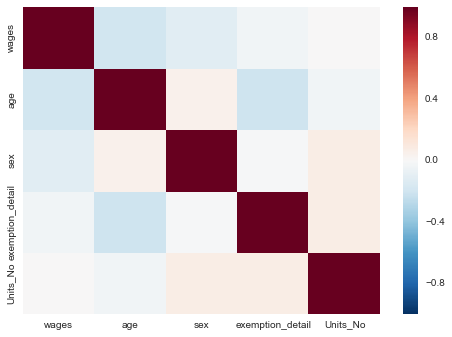

In [137]:
sns.heatmap(df[['wages', 'age', 'sex', 'exemption_detail', 'Units_No']].corr())

In [138]:
from sklearn import tree, cross_validation, linear_model, metrics
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=1)

In [149]:
# This is just a utility method to help print a summary of the results
def format_model_results(sklearn_model, X_train, X_test, y_train, y_test):
    # Get the model's class name (E.g. LogisticRegression, KNearestNeighbor, etc.) and store it to a string
    model_class_name = sklearn_model.__class__.__name__  
    
    y_test_pred   = sklearn_model.predict(X_test)
    y_test_pred_proba   = sklearn_model.predict_proba(X_test)
    y_train_pred  = sklearn_model.predict(X_train)

    accuracy_score  = metrics.accuracy_score(y_test, y_test_pred)
    precision_score = metrics.precision_score(y_test, y_test_pred)
    recall_score    = metrics.recall_score(y_test, y_test_pred)
    f1_score        = metrics.f1_score(y_test, y_test_pred)
    f1_score_train  = metrics.f1_score(y_train, y_train_pred)
    auc_score       = metrics.roc_auc_score(y_test, y_test_pred_proba[:, 1])
    
    return pd.DataFrame({
            "Accuracy": accuracy_score, 
            "Precision": precision_score, 
            "Recall": recall_score, 
            "F1 score": f1_score, 
            "F1 score (train)": f1_score_train, 
            "AUC": auc_score
        }, index=[model_class_name])

In [139]:
#y_test_predict = model.predict(X_test)
#y_train_predict = model.predict(X_train)

dectree_model = tree.DecisionTreeClassifier()
dectree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [140]:
y_test_pred = dectree_model.predict(X_test)
y_train_pred = dectree_model.predict(X_train)


print "precision_score =", metrics.precision_score(y_test_pred, y_test)
print "recall_score =", metrics.recall_score(y_test_pred, y_test)
print "f1_score =", metrics.f1_score(y_test_pred, y_test)
print "f1_score_train =", metrics.f1_score(y_train_pred, y_train)
print "auc_score =", metrics.roc_auc_score(y_test_pred, y_test)

precision_score = 0.780525502318
recall_score = 0.760542168675
f1_score = 0.770404271548
f1_score_train = 0.96899911426
auc_score = 0.783803693033


In [141]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), dectree_model.feature_importances_), columns_to_keep_3) , reverse=True)

Features sorted by their score:
[(0.5279, 'Units_No'), (0.2254, 'wages'), (0.1612, 'age'), (0.0307, 'gender_2'), (0.0212, 'race1_2'), (0.0147, 'toilet_1'), (0.0089, 'race'), (0.0055, 'race1_4'), (0.0021, 'race1_3'), (0.0014, 'race1_6'), (0.001, 'race1_5')]


In [ ]:
"""
Again units has the strongest importance by a lot. But looking to the other correlates. Wages
follows after that and then age.

"""

In [142]:
#KNN
from sklearn import neighbors, metrics, grid_search, cross_validation
KNN_model = neighbors.KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')
KNN_model.fit(X, y)

y_test_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

In [143]:
from sklearn.neighbors import KNeighborsClassifier  # Our classifier
from sklearn.cross_validation import train_test_split  # Train-test 

from sklearn.cross_validation import KFold



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

k = 200

knn_classif = KNeighborsClassifier(k)

knn_classif.fit(X_train, y_train)

# 5. Score
#print "Train score: ", knn_classif.score(X_test, y_test)

#len(X_test)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=200, p=2,
           weights='uniform')

In [144]:
y_test_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

In [145]:
print "precision_score =", metrics.precision_score(y_test_pred, y_test)
print "recall_score =", metrics.recall_score(y_test_pred, y_test)
print "f1_score =", metrics.f1_score(y_test_pred, y_test)
print "f1_score_train =", metrics.f1_score(y_train_pred, y_train)
print "auc_score =", metrics.roc_auc_score(y_test_pred, y_test)

precision_score = 0.975710594315
recall_score = 0.956433637285
f1_score = 0.965975952929
f1_score_train = 0.958747903857
auc_score = 0.96765502089


In [147]:
y_test = KNN_model.predict(X_test)
y_train = KNN_model.predict(X_train)

In [148]:
KNN_model.score(X, y)

0.96413260931694766

In [189]:
## find best value for K


#k = range(1, len(df))

#score_df = pd.DataFrame({'k': k})

#KNN_models = score_df.\
 #   apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, y), axis = 1)

#KNN_models

#score_df['Score'] = KNN_models.map(lambda model: model.score(X, y))

In [88]:
#from sklearn.neighbors import KNeighborsClassifier  # Our classifier
#from sklearn.cross_validation import train_test_split  # Train-test 

#X_1 = df_model.columns_to_keep_3
#y_1 = df_model.exemption

In [151]:
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [152]:
format_model_results(knn_model, X_train, X_test, y_train, y_test)

,AUC,Accuracy,F1 score,F1 score (train),Precision,Recall
KNeighborsClassifier,0.837022,0.769469,0.759324,0.876026,0.745605,0.773556


In [153]:
format_model_results(rf_model, X_train, X_test, y_train, y_test)

,AUC,Accuracy,F1 score,F1 score (train),Precision,Recall
RandomForestClassifier,0.920793,0.849726,0.846733,0.886179,0.813346,0.882979


In [154]:
format_model_results(dectree_model, X_train, X_test, y_train, y_test)

,AUC,Accuracy,F1 score,F1 score (train),Precision,Recall
DecisionTreeClassifier,0.870729,0.861157,0.851993,0.969024,0.853944,0.850051


In [ ]:
"""From looking at these results, the highest AUC score comes from the Random forest, and
the overfitting is not terrible. Overfitting is the strongest in KNN. What we can conclude from 
these models is I would use Random Forest going forward as a predcitor. If you have more units, 
in the building, that is an important predictor but I would want to analyze if it should actually
be included.

Going forward, I would also like to run with different features.
"""